In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('Diwali Sales Data.csv', encoding = "unicode_escape" )
# to avoid encoding error;  using "unicode_escape"

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)  # drop coloumn   

In [7]:
# chcek for null value 
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)  #delete null value

In [9]:
df.isnull().sum() #to check is  null value are proply deleted.

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
# change data type 
df['Amount'] = df['Amount'].astype(int)

In [11]:
df['Amount'].dtype

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
# describe() show the description of data in the dataframe.
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
# describe() for specific coloumns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

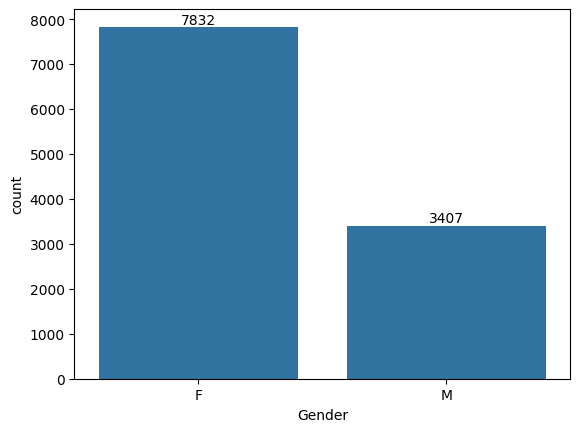

In [15]:
ax = sns.countplot(x='Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
sales_gen = df.groupby('Gender', as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)

<Axes: xlabel='Gender', ylabel='Amount'>

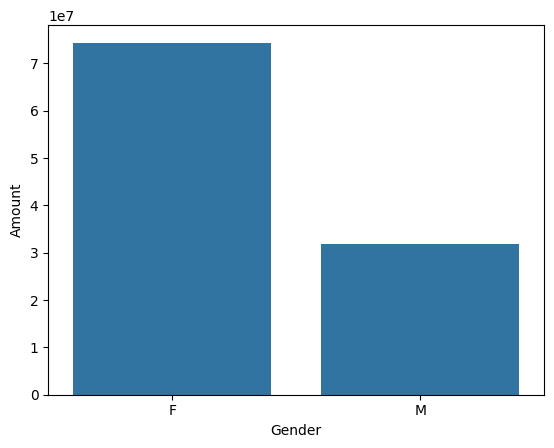

In [17]:
sns.barplot(x='Gender', y='Amount', data = sales_gen )


##### *from above graph we can see that most of the buyer are female and even the purchasing power of female is grater then man.*

### Age 

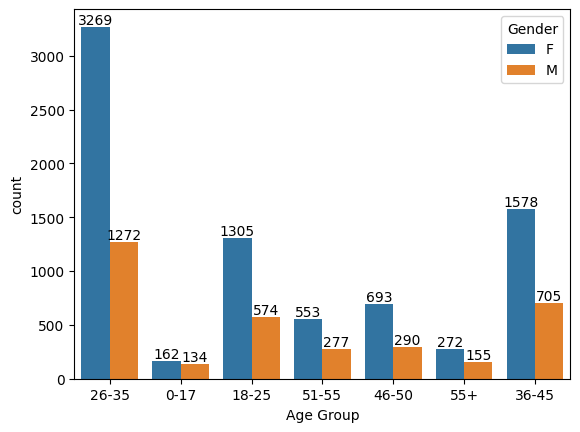

In [18]:
ag = sns.countplot(data = df , x = "Age Group", hue='Gender')

for bars in ag.containers:
    ag.bar_label(bars)

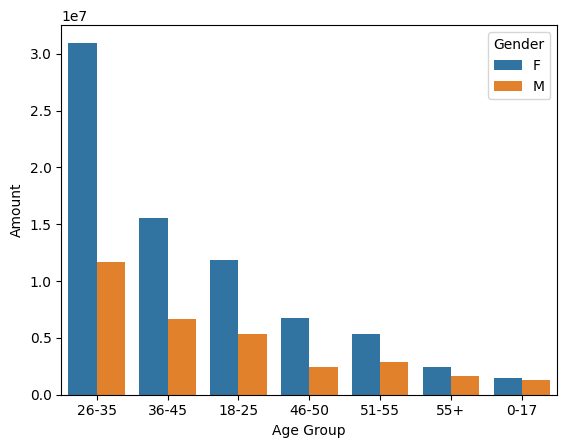

In [19]:
# Total Amount vd age group 
sales_age = df.groupby(["Age Group", "Gender"], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount' , data = sales_age , hue='Gender')
plt.show()

##### *from above graph we can see that most of the buyer are of age between 26-35 yrs female*

### State

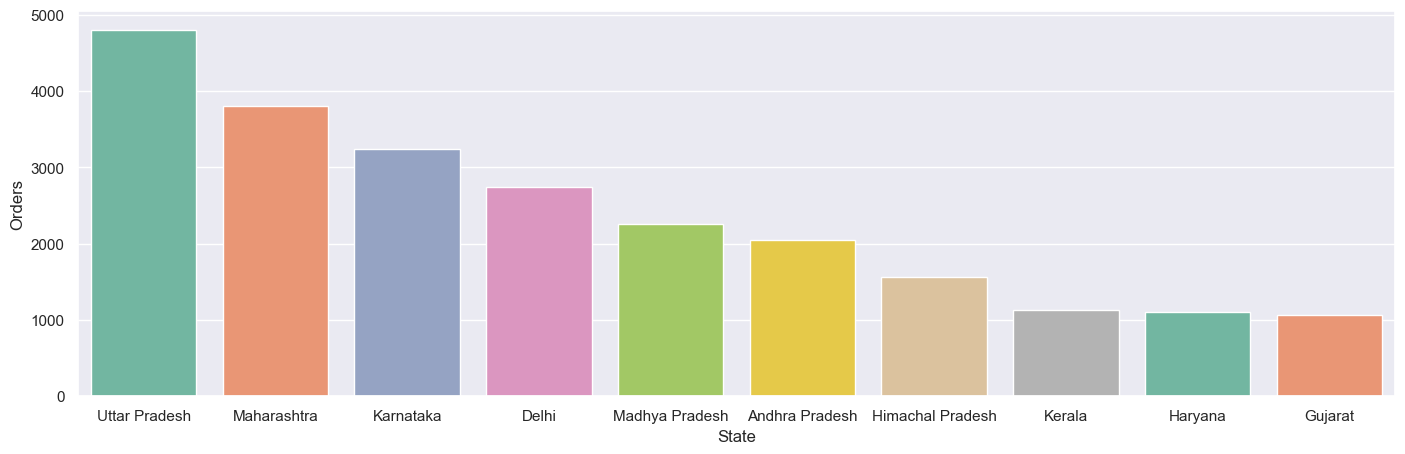

In [20]:
# total number of order from top 10 states
sales_states = df.groupby('State', as_index = False)['Orders'].sum().sort_values(by="Orders",  ascending = False).head(10)
sns.set(rc= {'figure.figsize':(17,5)})
sns.barplot(data = sales_states, x = 'State', y= 'Orders',  palette='Set2', hue= 'State' , legend=False)
plt.show()


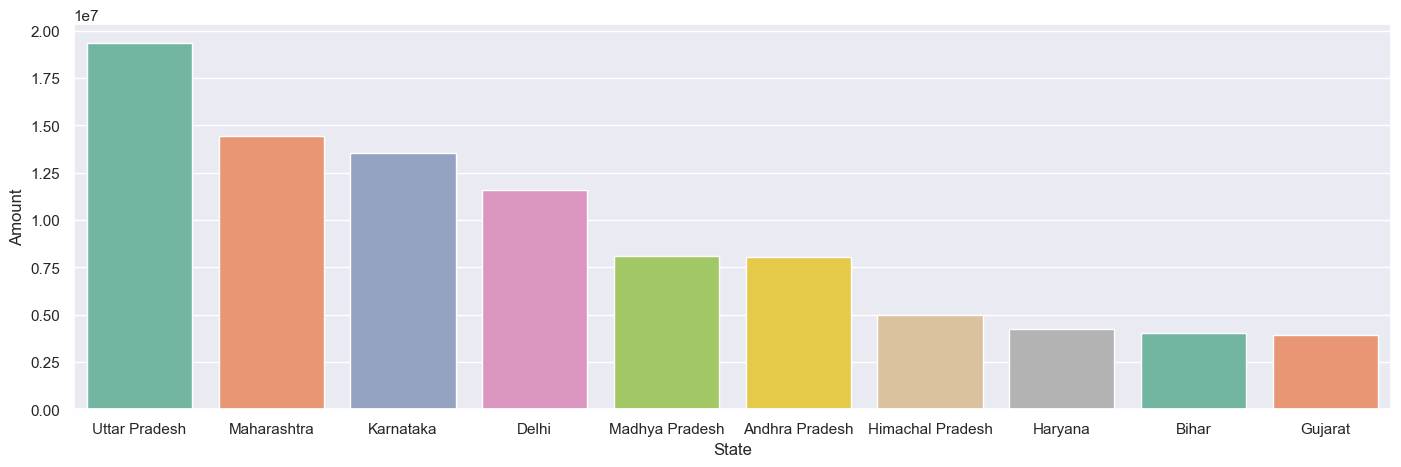

In [21]:
# total amount/sales from top 10 states.
sales_states = df.groupby('State', as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_states, x = 'State', y = 'Amount', palette='Set2', hue= 'State' , legend=False)
plt.show()

##### *from above graph we can see that most of the order & total/salse Amount are from uttar pradesh maharashtra karnataka respectively*

### Maritl Status

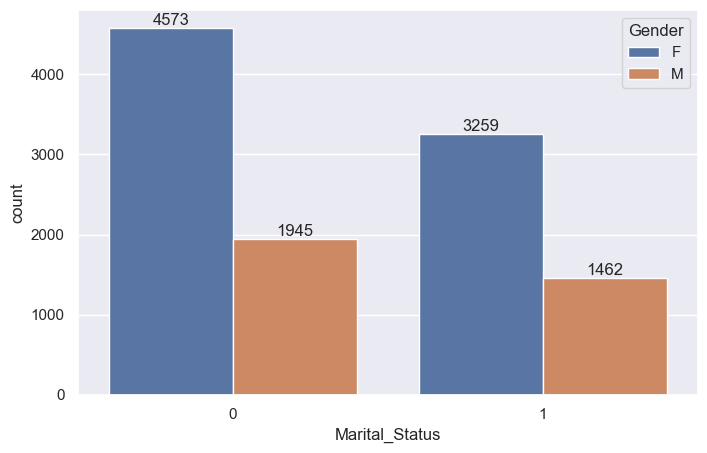

In [33]:
ax = sns.countplot(data = df, x = 'Marital_Status' , hue='Gender')
sns.set(rc = {'figure.figsize':(8,5)})

for bars in ax.containers:
    ax.bar_label(bars)

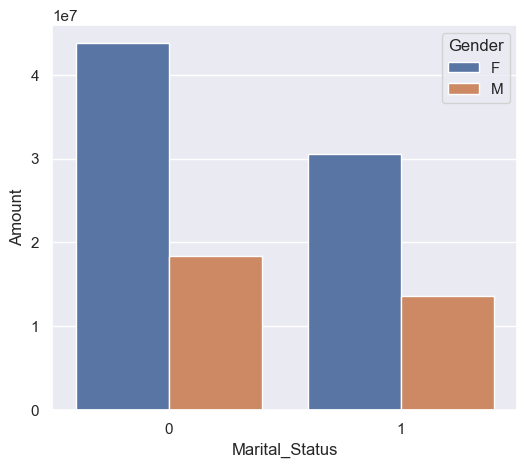

In [23]:
sales_state = df.groupby(['Marital_Status' , 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc = {'figure.figsize':(6,5)})

sns.barplot(data = sales_state , x = 'Marital_Status', y = 'Amount' , hue='Gender')
plt.show()

##### *from above graph we can see that most the buyer are unmarried (women) and have high purchasing power*

### Occupation

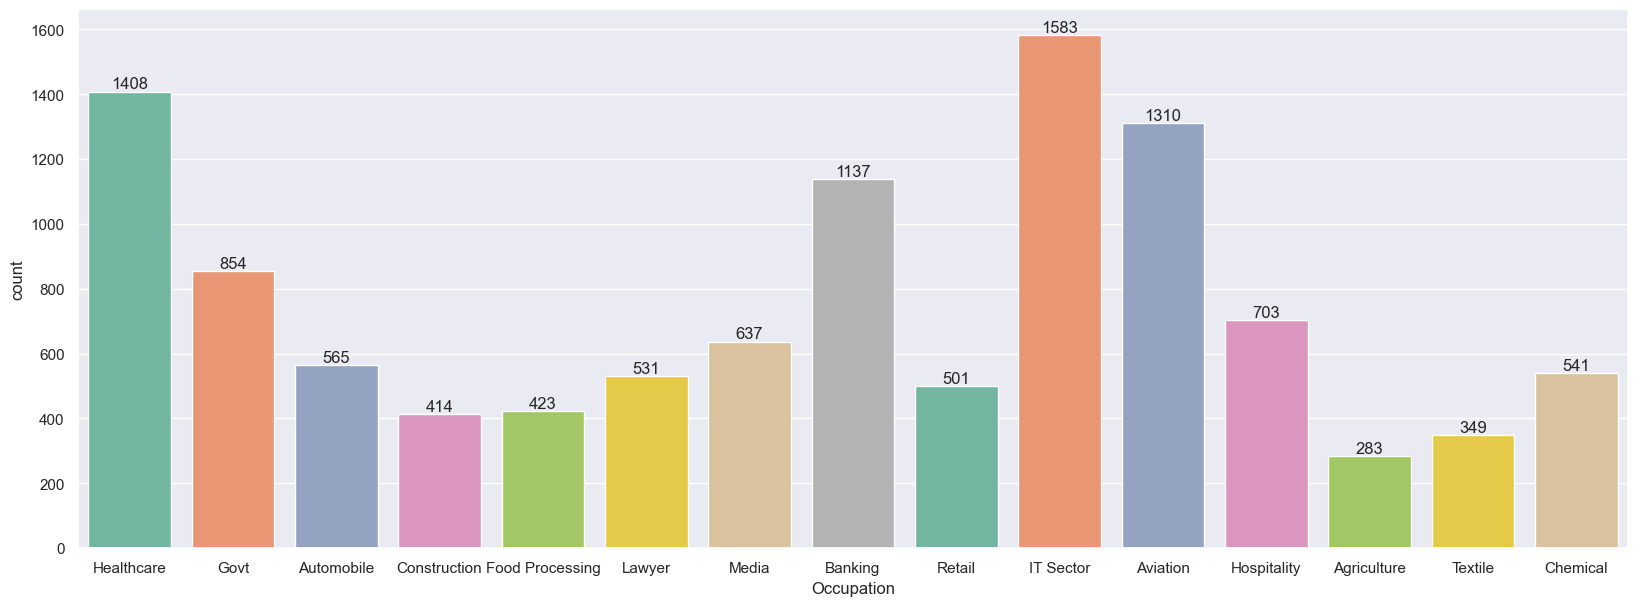

In [35]:
ax = sns.countplot(data=df , x = 'Occupation' , hue='Occupation', palette='Set2', legend=False)
sns.set(rc={'figure.figsize':(21,7)})

for bars in ax.containers:
    ax.bar_label(bars)

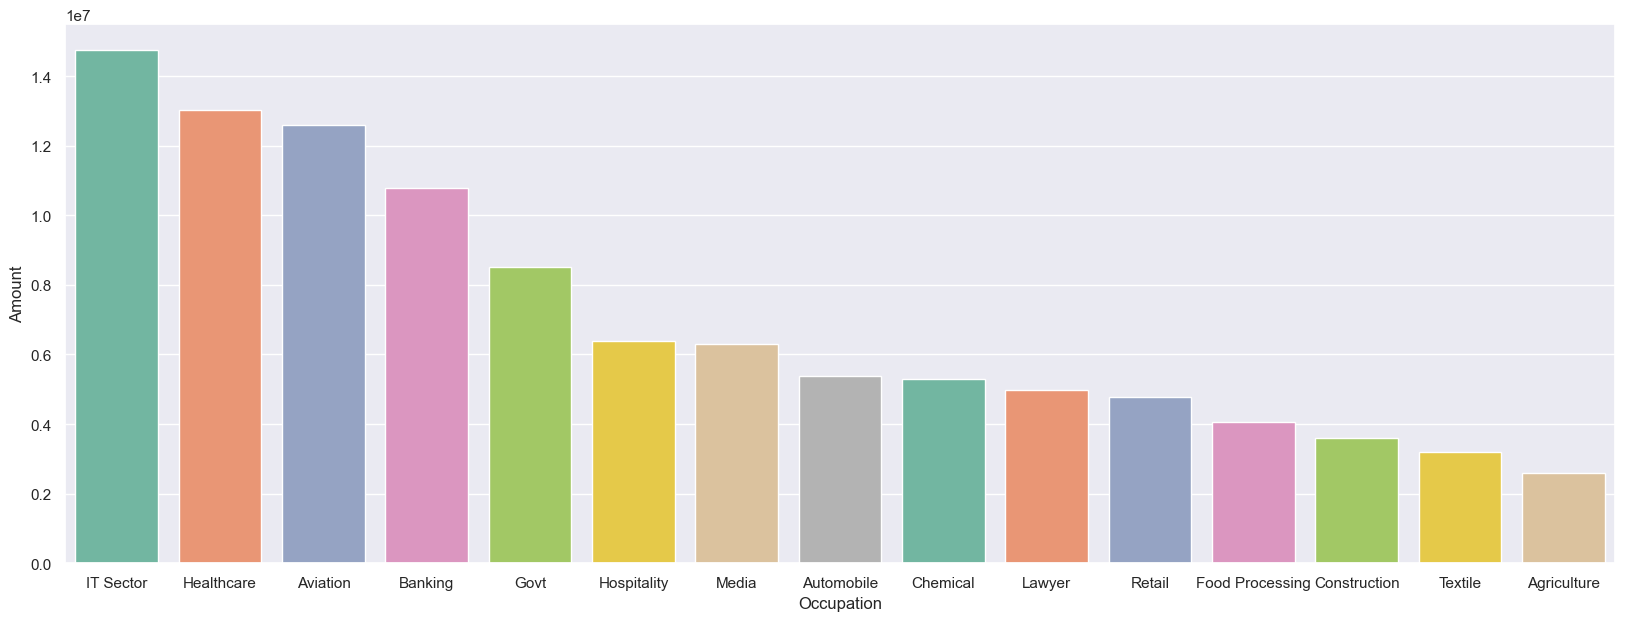

In [25]:
sales_occp = df.groupby('Occupation', as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data = sales_occp , x = 'Occupation', y = 'Amount', hue='Occupation', palette='Set2', legend=False)
plt.show()

##### *from above graph we can see that most of the buyer are working in  IT, Healthcare , Aviation  sector*

### Product Category

In [26]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


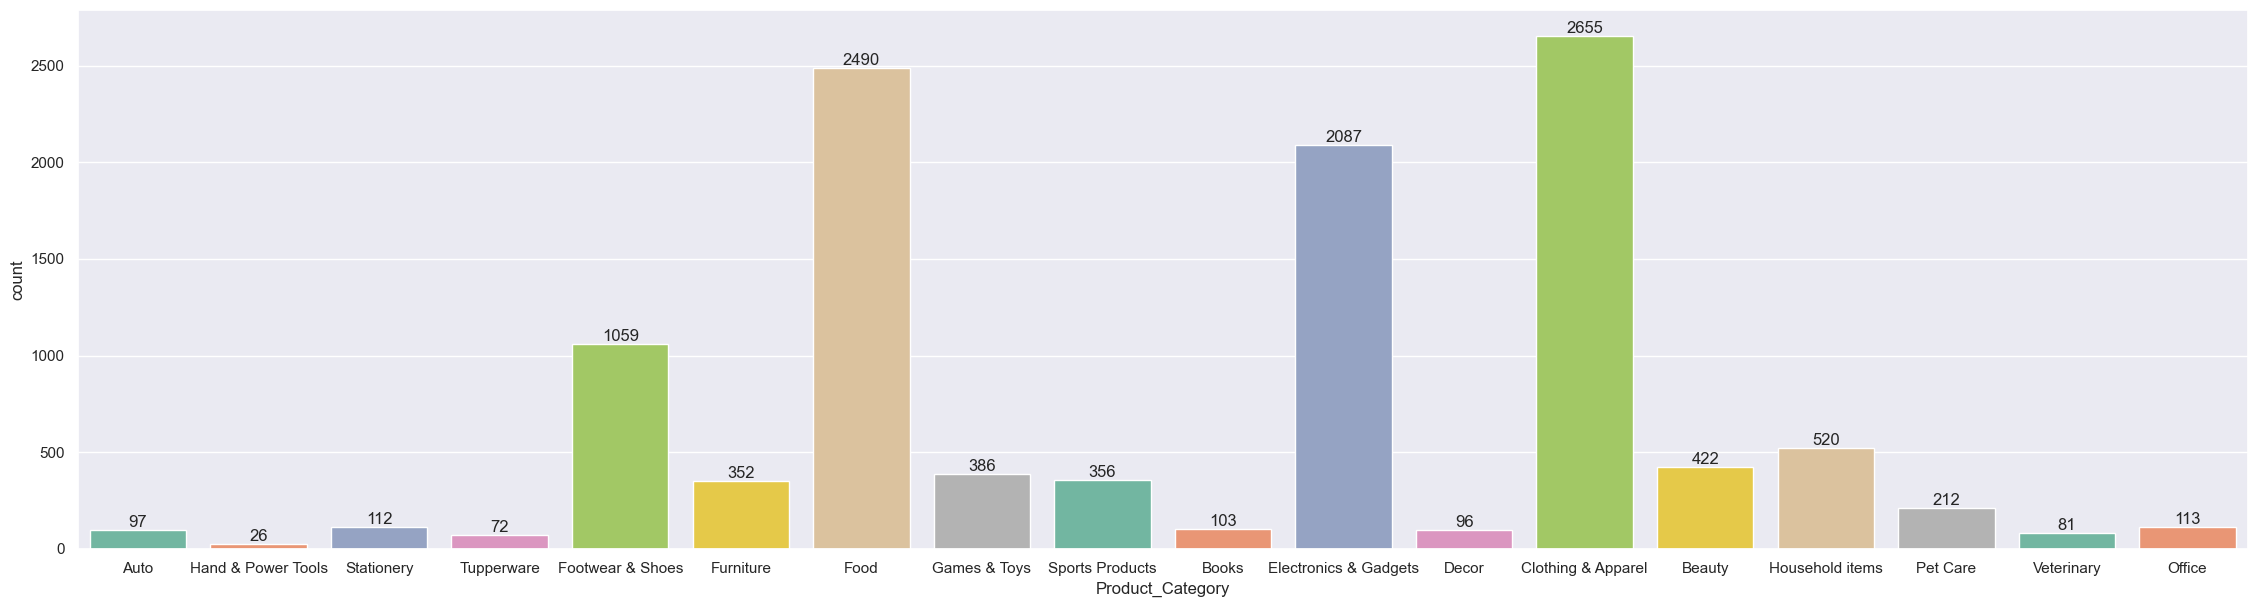

In [27]:
sns.set(rc = {'figure.figsize':(28,7)})
ax = sns.countplot(x = 'Product_Category' , data = df , hue = 'Product_Category',  palette='Set2', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

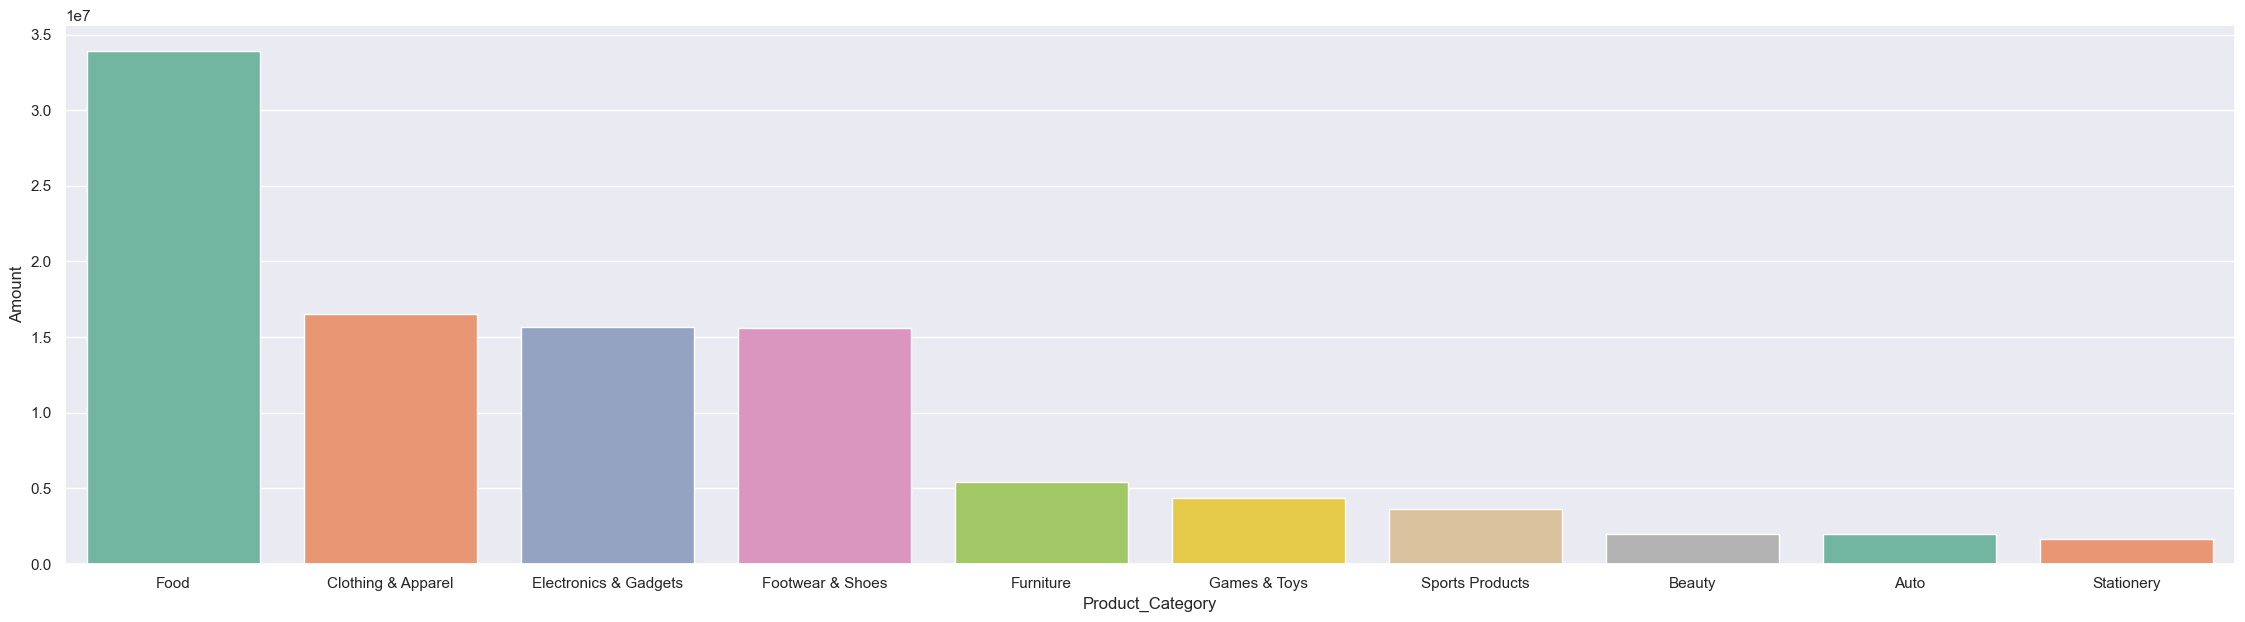

In [28]:
sales_prod = df.groupby('Product_Category' , as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.barplot(data = sales_prod , x = 'Product_Category' , y = 'Amount', hue = 'Product_Category',  palette='Set2', legend=False)
plt.show()

##### *from above graph we can see that most of the sold product are Food, Clothing and Electronics category*

# Conclusion

 *The data emphasizes unmarried women aged 26-35 as significant buyers, primarily from IT, Healthcare, and Aviation industries. Leading sales regions are Uttar Pradesh, Maharashtra, and Karnataka, with top-selling categories in Food, Clothing, and Electronics.*